# Loading in our data from main.ipynb to build the initial model

### Loading the data

In [18]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

with open("prepared_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_val = data["X_val"]
X_test = data["X_test"]
y_train = data["y_train"]
y_val = data["y_val"]
y_test = data["y_test"]
num_classes = data["num_classes"]

### Data Normalization

In [19]:
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

### Building the model

In [ ]:
def leNet_model_iteration8(num_classes):
  model = Sequential()
  model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(num_classes, activation='softmax'))

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

  return model

model = leNet_model_iteration8(num_classes)


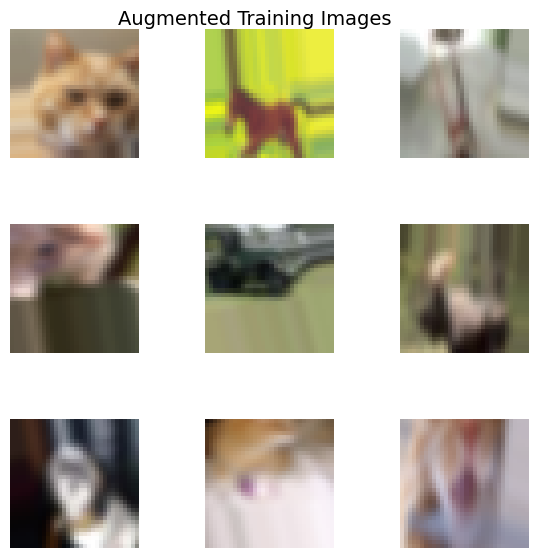

In [21]:
datagen = ImageDataGenerator(
    width_shift_range=0.5,
    height_shift_range=0.2,
    zoom_range=0.4,
    shear_range=0.3,
    rotation_range=15
)

datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train, batch_size=50)

batches = datagen.flow(X_train, y_train, batch_size=9)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(3, 3, figsize=(6, 6))
fig.tight_layout()

for i in range(9):
    r = i // 3
    c = i % 3
    axs[r, c].imshow(X_batch[i])
    axs[r, c].axis('off')

plt.suptitle('Augmented Training Images', fontsize=14)
plt.show()

### Training the model

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 50,
    epochs=30,
    batch_size=50,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


819/819 ━━━━━━━━━━━━━━━━━━━━ 36s 34ms/step - accuracy: 0.1959 - loss: 3.1362 - val_accuracy: 0.2853 - val_loss: 2.3663
Epoch 2/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.2927 - loss: 2.3075 - val_accuracy: 0.4084 - val_loss: 1.9383
Epoch 3/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.3328 - loss: 2.1555 - val_accuracy: 0.3734 - val_loss: 1.9990
Epoch 4/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.3560 - loss: 2.0580 - val_accuracy: 0.4486 - val_loss: 1.7487
Epoch 5/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.3783 - loss: 2.0026 - val_accuracy: 0.4222 - val_loss: 1.8973
Epoch 6/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.3885 - loss: 1.9604 - val_accuracy: 0.4464 - val_loss: 1.8279
Epoch 7/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.4179 - loss: 1.8771 - val_accuracy: 0.4802 - val_loss: 1.6503
Epoch 8/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.4243 - loss: 1.8545 - val_accurac

### Evaluating the model

285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7058 - loss: 0.9067
Test Loss: 1.1494523286819458
Test Accuracy: 0.6360439658164978


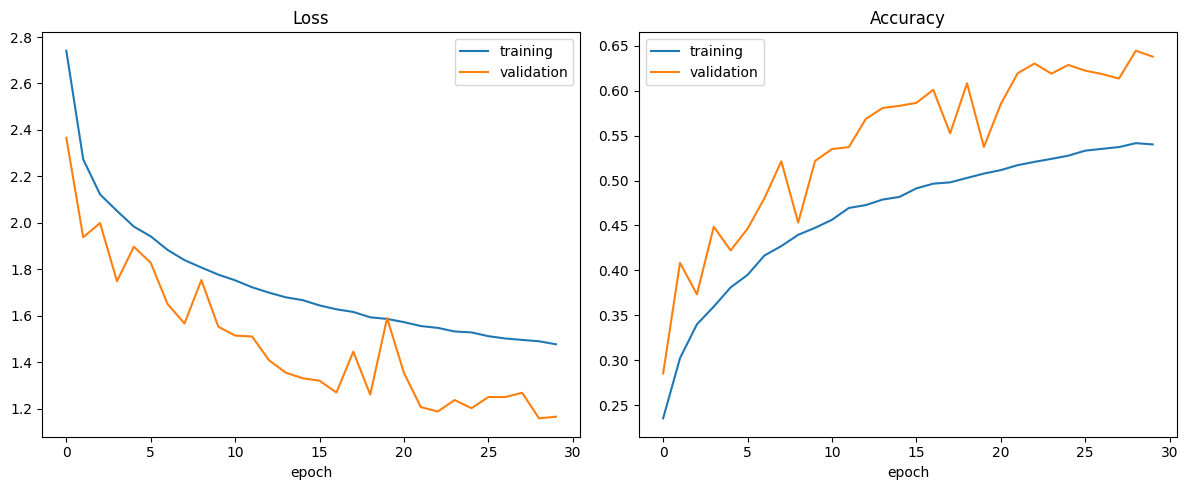

In [23]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title("Loss")
plt.xlabel("epoch")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title("Accuracy")
plt.xlabel("epoch")

plt.tight_layout()
plt.show()
